In [1]:
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    plt.figure(figsize=(20, 20))
    plt.imshow(image)
    plt.axis(False)
    plt.show()

In [66]:
img = np.zeros((100, 100, 3))

In [67]:
def LerpInt(P0, P1, t):
    return (int((1 - t)*P0[0] + t*P1[0]), int((1 - t)*P0[1] + t*P1[1]))

In [68]:
def GetAmountPointsBetweenTwoPoints(P0, P1):
     return abs(P0[0] - P1[0]) + abs(P0[1] - P1[1])

In [91]:
def DrawLine(P0, P1, image, color=[1.0, 1.0, 1.0]):
    dist = GetAmountPointsBetweenTwoPoints(P0, P1)
    for t in range(dist):
        point = LerpInt(P0, P1, t/dist)
        if ((point[0] >= 0) and (point[1] >= 0) and (point[0] < image.shape[0] - 1) and (point[1] < image.shape[1] - 1)): #not checked these right way round
            image[point] = color

In [76]:
DrawLine((5, 5),(134, 156), img)

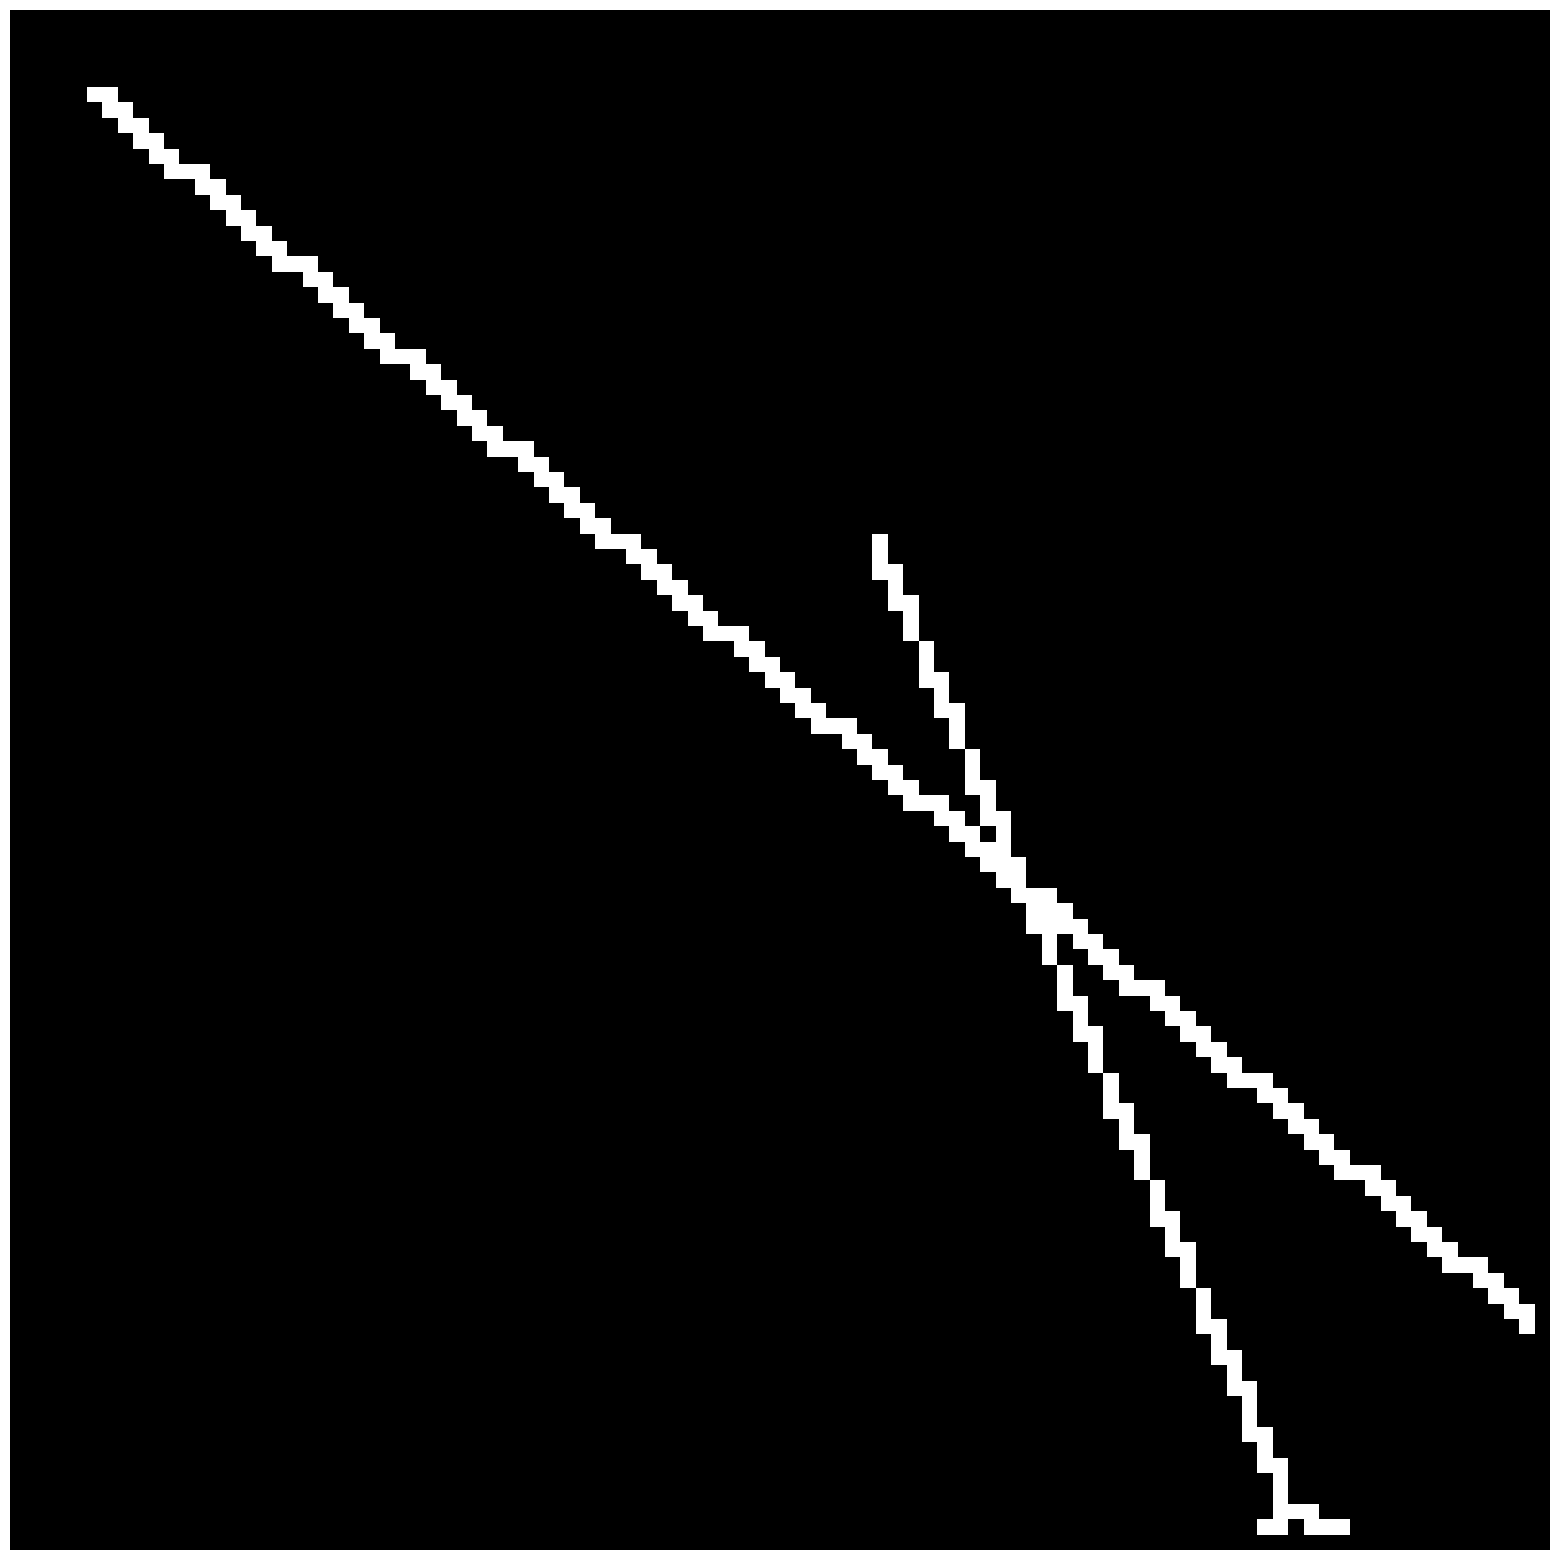

In [77]:
display_image(img)

In [10]:
img = np.zeros((100, 100, 3))

In [11]:
def QuadraticBezierCurve(P0, P1, P2, t):
    LP0 = ((1 - t)*P0[0] + t*P1[0], (1 - t)*P0[1] + t*P1[1])
    LP1 = ((1 - t)*P1[0] + t*P2[0], (1 - t)*P1[1] + t*P2[1])
    return (int((1 - t)*LP0[0] + t*LP1[0]), int((1 - t)*LP0[1] + t*LP1[1]))

In [12]:
def GetAmountPointsBetweenThreePoints(P0, P1, P2):
     return abs(P0[0] - P1[0]) + abs(P0[1] - P1[1]) + abs(P1[0] - P2[0]) + abs(P1[1] - P2[1])

In [13]:
def DrawQuadraticBezierCurve(P0, P1, P2, image):
    dist = GetAmountPointsBetweenThreePoints(P0, P1, P2)
    for t in range(dist):
        image[QuadraticBezierCurve(P0, P1, P2, t/dist)] = [1.0, 1.0, 1.0]

In [14]:
DrawQuadraticBezierCurve((0,0),(125, 45), (0, 99), img)

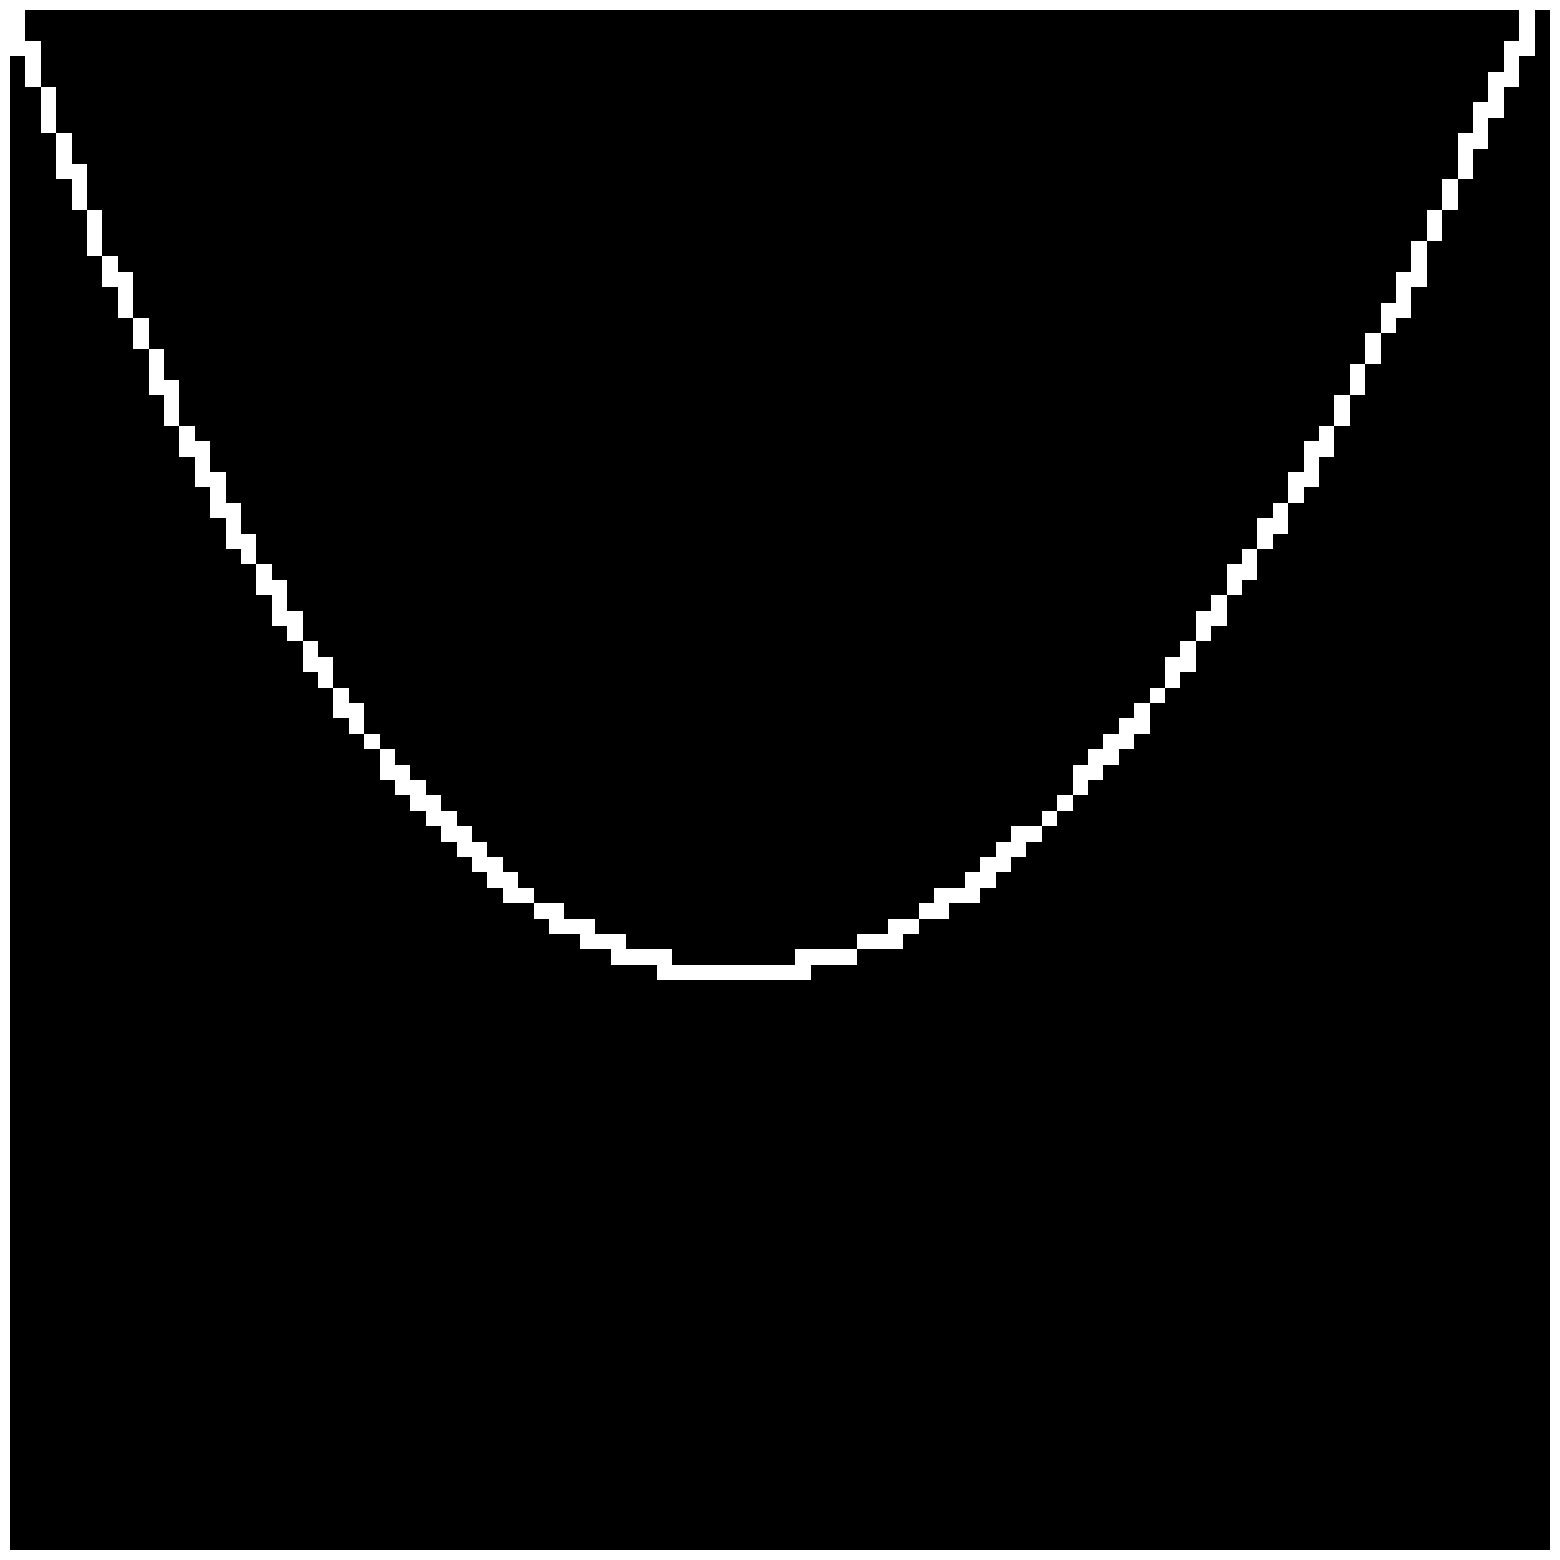

In [15]:
display_image(img)

In [16]:
img = np.zeros((100, 100, 3))

In [17]:
def CubicBezierCurve(P0, P1, P2, P3, t):
    LP0 = ((1 - t)*P0[0] + t*P1[0], (1 - t)*P0[1] + t*P1[1])
    LP1 = ((1 - t)*P1[0] + t*P2[0], (1 - t)*P1[1] + t*P2[1])
    LP2 = ((1 - t)*P2[0] + t*P3[0], (1 - t)*P2[1] + t*P3[1])

    LLP0 = ((1 - t)*LP0[0] + t*LP1[0], (1 - t)*LP0[1] + t*LP1[1])
    LLP1 = ((1 - t)*LP1[0] + t*LP2[0], (1 - t)*LP1[1] + t*LP2[1])
    
    return (int((1 - t)*LLP0[0] + t*LLP1[0]), int((1 - t)*LLP0[1] + t*LLP1[1]))

In [18]:
def GetAmountPointsBetweenFourPoints(P0, P1, P2, P3):
     return abs(P0[0] - P1[0]) + abs(P0[1] - P1[1]) + \
            abs(P1[0] - P2[0]) + abs(P1[1] - P2[1]) + \
            abs(P2[0] - P3[0]) + abs(P2[1] - P3[1])

In [19]:
def DrawCubicBezierCurve(P0, P1, P2, P3, image):
    dist = GetAmountPointsBetweenFourPoints(P0, P1, P2, P3)
    for t in range(dist):
        image[CubicBezierCurve(P0, P1, P2, P3, t/dist)] = [1.0, 1.0, 1.0]

In [20]:
DrawCubicBezierCurve((0,99),(99, 88), (0, 20), (0, 0), img)

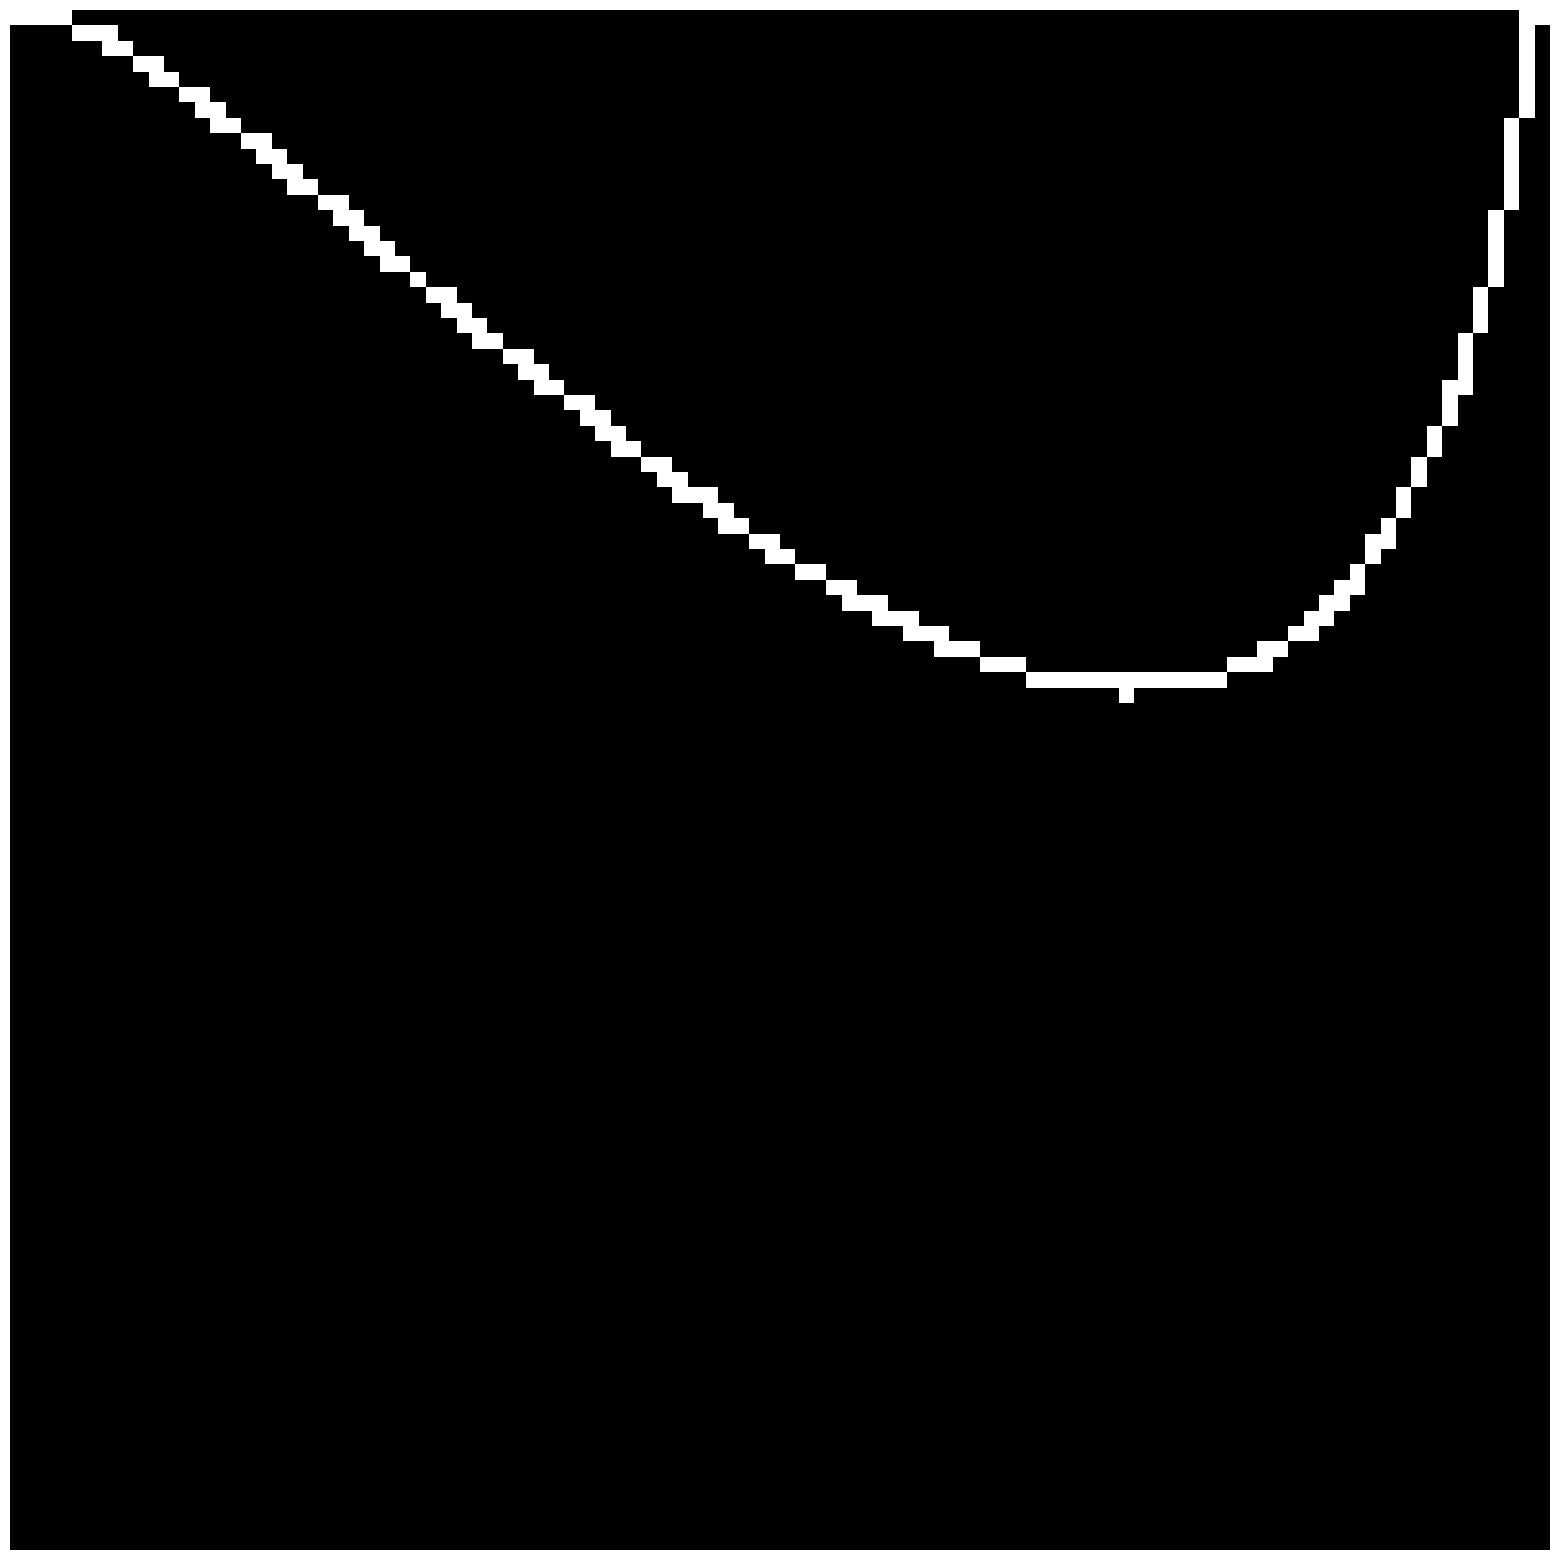

In [21]:
display_image(img)

In [23]:
img = np.zeros((100, 100, 3))

In [22]:
def CubicBezierCurveBernstein(P0, P1, P2, P3, t):
    Px = P0[0]*(-t**3 + 3*t**2 - 3*t + 1) + \
            P1[0]*(3*t**3 - 6*t**2 + 3*t) + \
            P2[0]*(-3*t**3 + 3*t**2) + \
            P3[0]*(t**3)

    Py = P0[1]*(-t**3 + 3*t**2 - 3*t + 1) + \
            P1[1]*(3*t**3 - 6*t**2 + 3*t) + \
            P2[1]*(-3*t**3 + 3*t**2) + \
            P3[1]*(t**3)
    
    return (int(Px), int(Py))

In [24]:
def DrawCubicBezierCurveBernstein(P0, P1, P2, P3, image):
    dist = GetAmountPointsBetweenFourPoints(P0, P1, P2, P3)
    for t in range(dist):
        image[CubicBezierCurveBernstein(P0, P1, P2, P3, t/dist)] = [1.0, 1.0, 1.0]

In [25]:
DrawCubicBezierCurveBernstein((0,99),(99, 88), (0, 20), (0, 0), img)

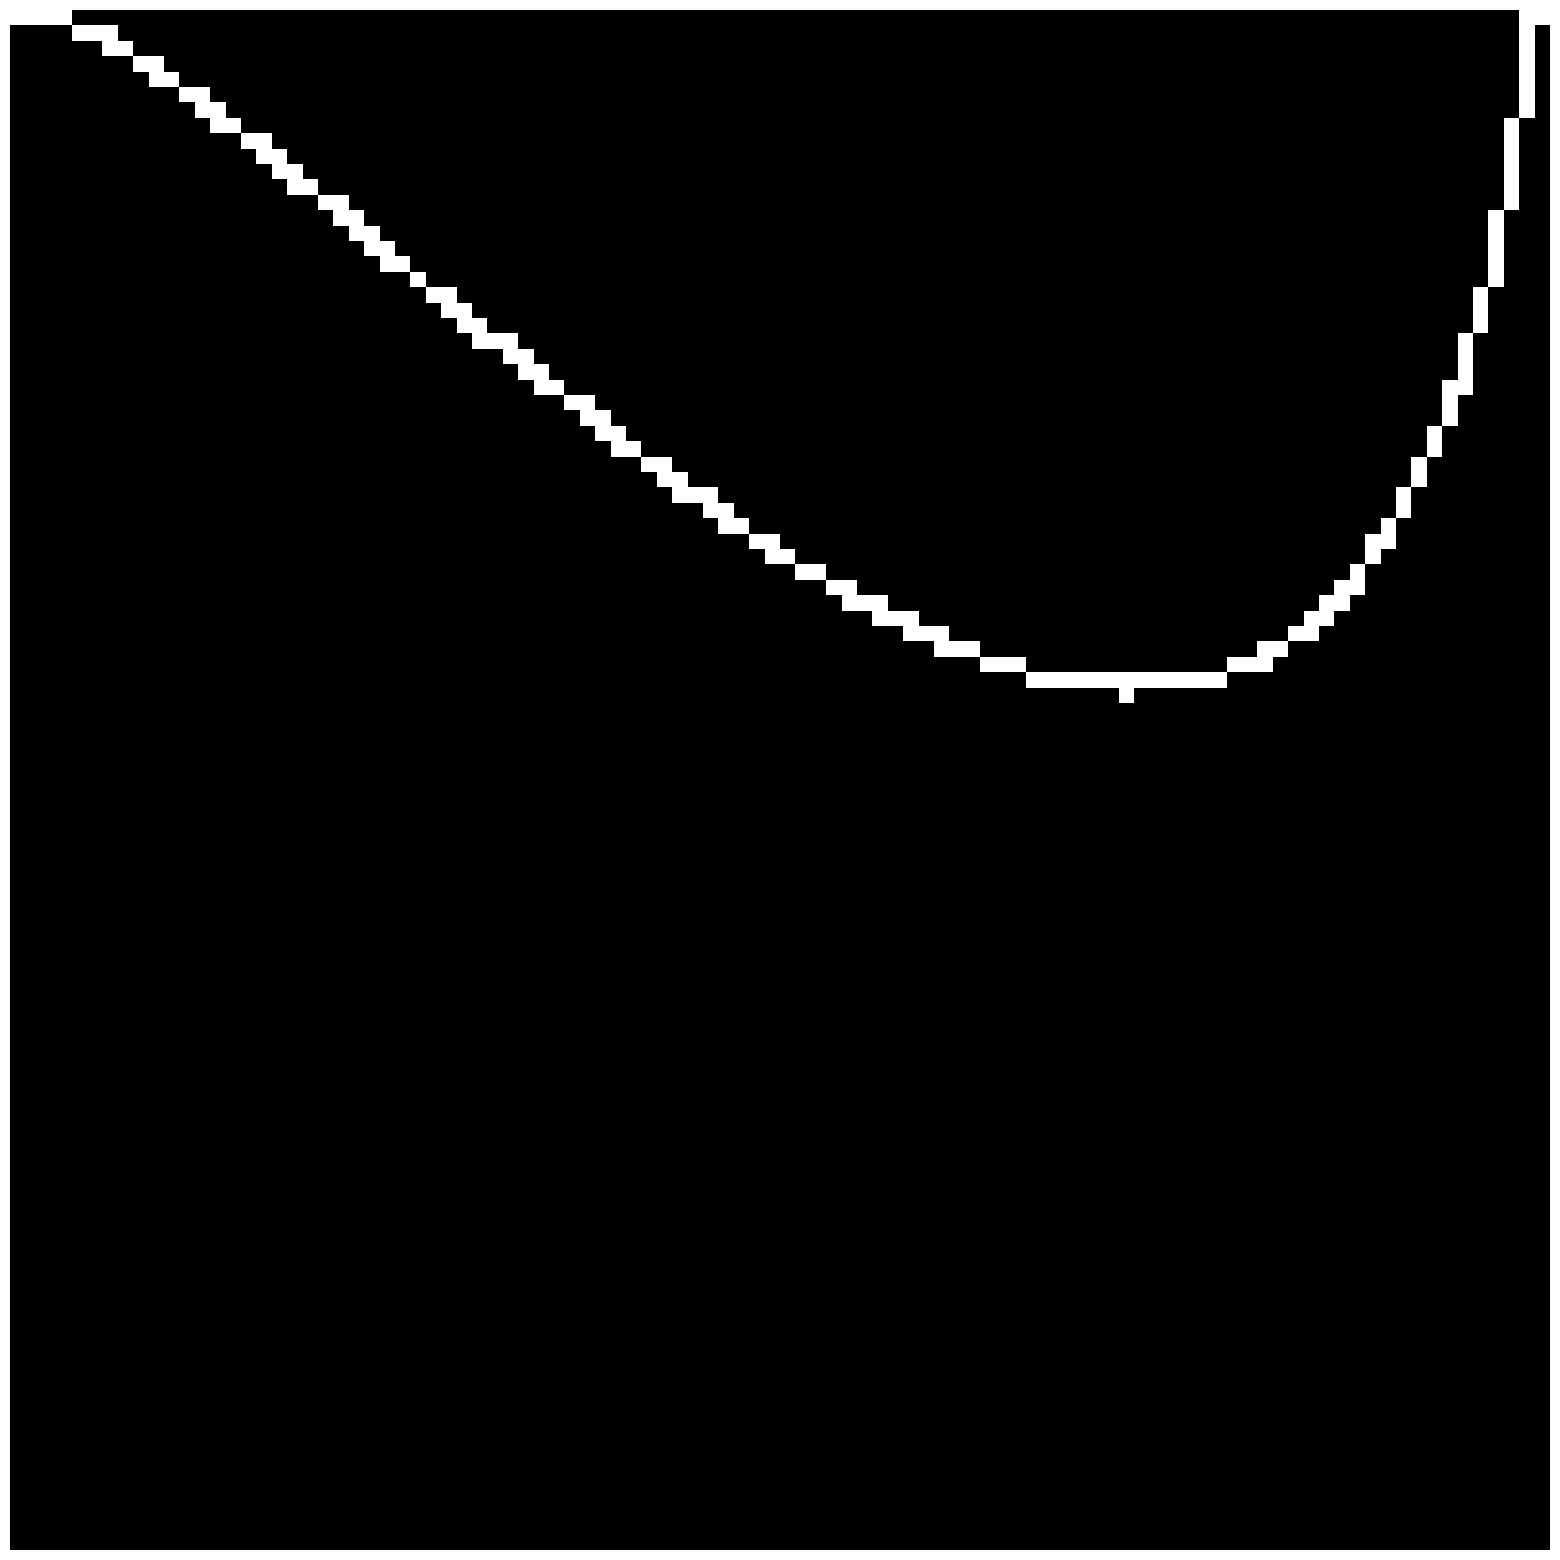

In [26]:
display_image(img)

In [27]:
img = np.zeros((100, 100, 3))

In [28]:
#most effecient
def CubicBezierCurveCoefficients(P0, P1, P2, P3, t):
    Px = P0[0] + \
        (-3*P0[0] + 3*P1[0]) * t + \
        (3*P0[0] - 6*P1[0] + 3*P2[0]) * t**2 + \
        (-P0[0] + 3*P1[0] - 3*P2[0] + P3[0]) * t**3

    Py = P0[1] + \
        (-3*P0[1] + 3*P1[1]) * t + \
        (3*P0[1] - 6*P1[1] + 3*P2[1]) * t**2 + \
        (-P0[1] + 3*P1[1] - 3*P2[1] + P3[1]) * t**3
    
    return (int(Px), int(Py))

In [29]:
def DrawCubicBezierCurveCoefficients(P0, P1, P2, P3, image):
    dist = GetAmountPointsBetweenFourPoints(P0, P1, P2, P3)
    for t in range(dist):
        image[CubicBezierCurveCoefficients(P0, P1, P2, P3, t/dist)] = [1.0, 1.0, 1.0]

In [30]:
DrawCubicBezierCurveCoefficients((0,99),(99, 88), (0, 20), (0, 0), img)

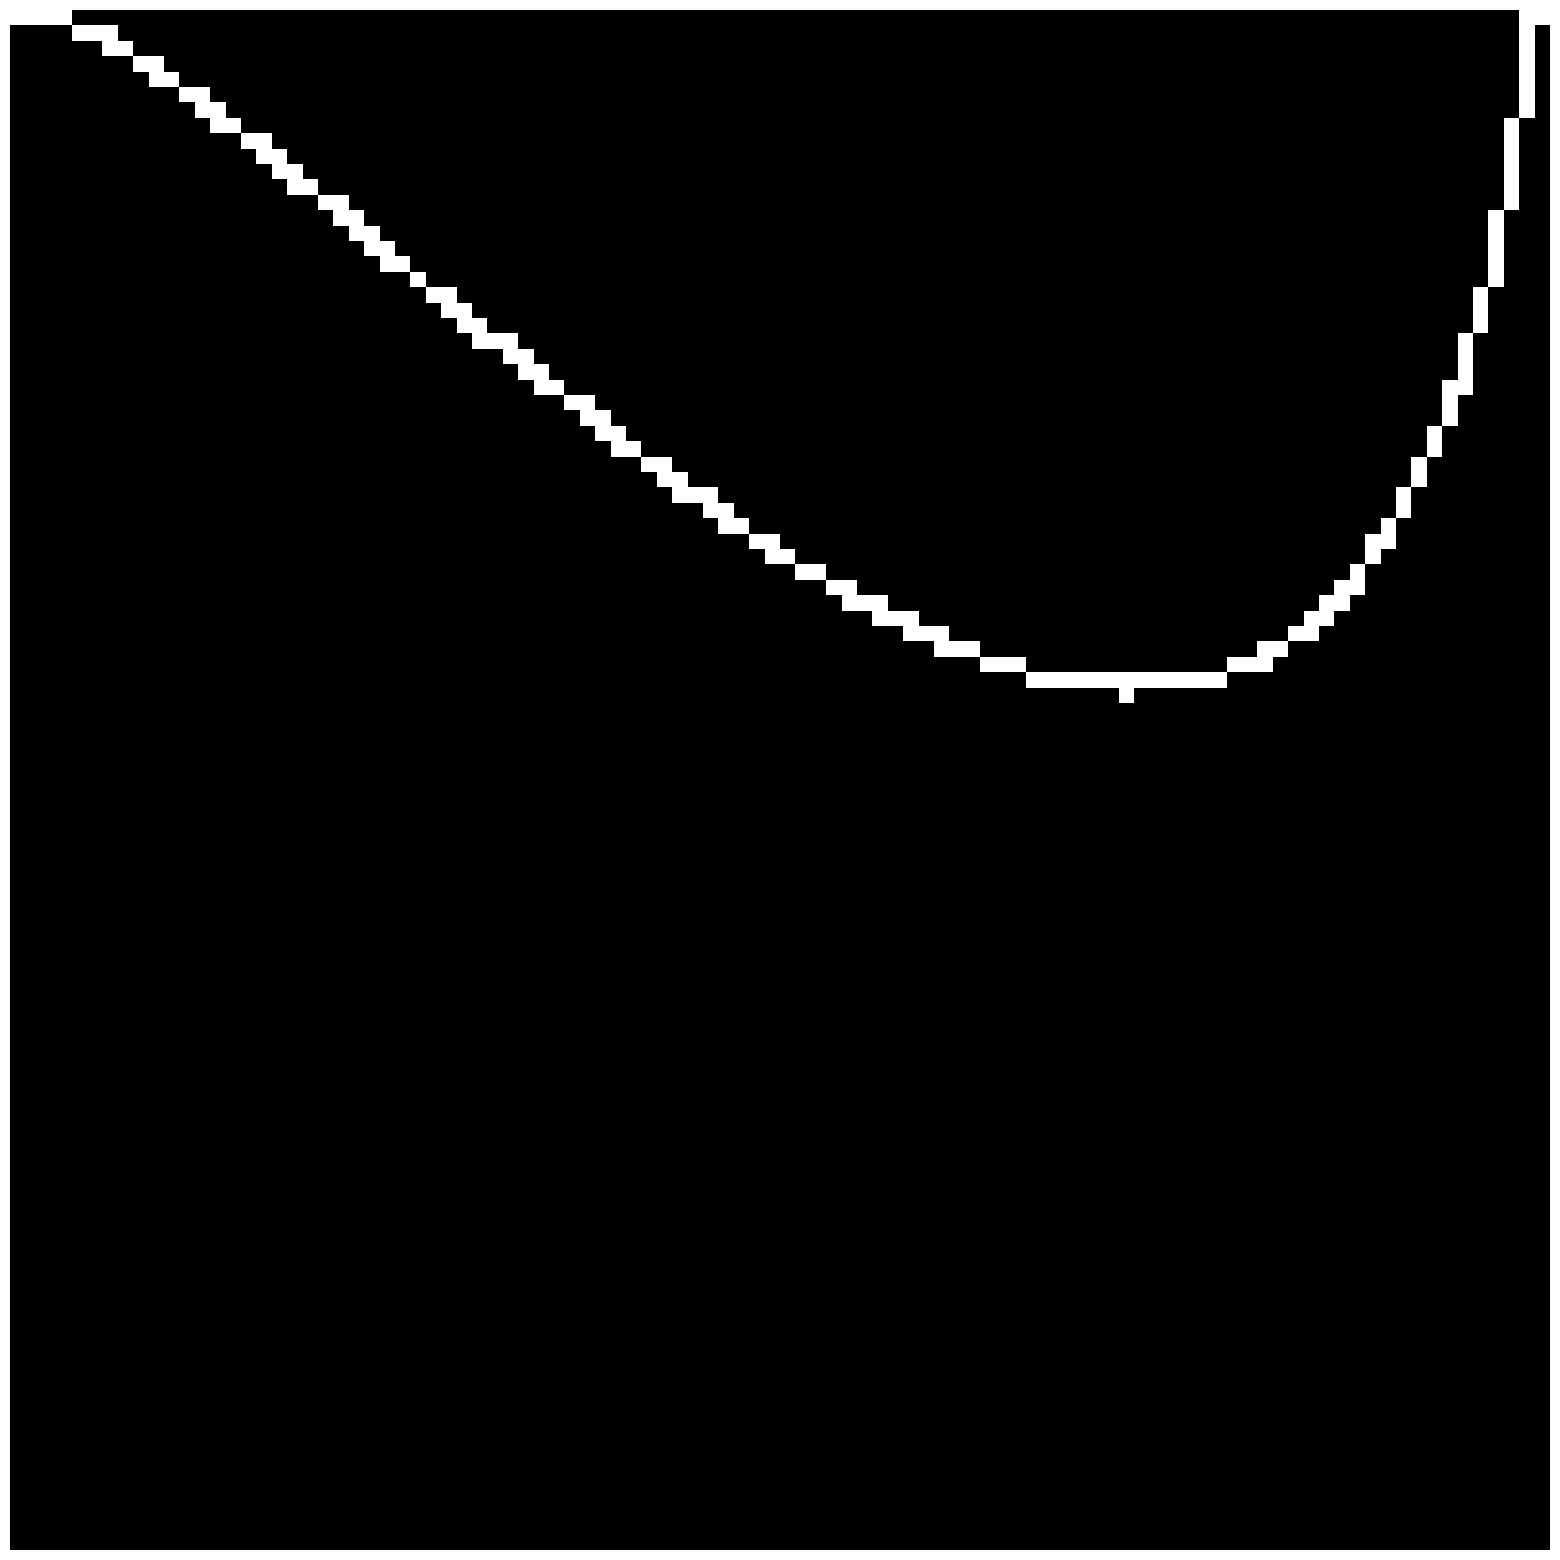

In [31]:
display_image(img)

In [32]:
img = np.zeros((100, 100, 3))

In [33]:
def DrawBezierSpline(curve_points, image):
    for i in range(len(curve_points)):
        if (i > 0):
            if (i % 3 == 0):
                DrawCubicBezierCurveCoefficients(curve_points[i-3],curve_points[i-2], curve_points[i-1], curve_points[i], image)

In [34]:
spline = ((0, 10), (10, 20), (20, 10), (30, 20), (40, 10), (50, 20), (60, 10,), (70, 20), (80, 10), (99, 20))

In [35]:
 DrawBezierSpline(spline, img)

In [36]:
def GetPositionOnBezierSpline(curve_Points, u, image):
    pos = int(u) * 3 + 3
    print((curve_Points[pos - 3], curve_Points[pos - 2], curve_Points[pos - 1], curve_Points[pos]))
    image[CubicBezierCurveCoefficients(curve_Points[pos - 3], curve_Points[pos - 2], curve_Points[pos - 1], curve_Points[pos], u % 1)] = [1.0, 0.0, 0.0]

In [37]:
GetPositionOnBezierSpline(spline, 2.99, img)

((60, 10), (70, 20), (80, 10), (99, 20))


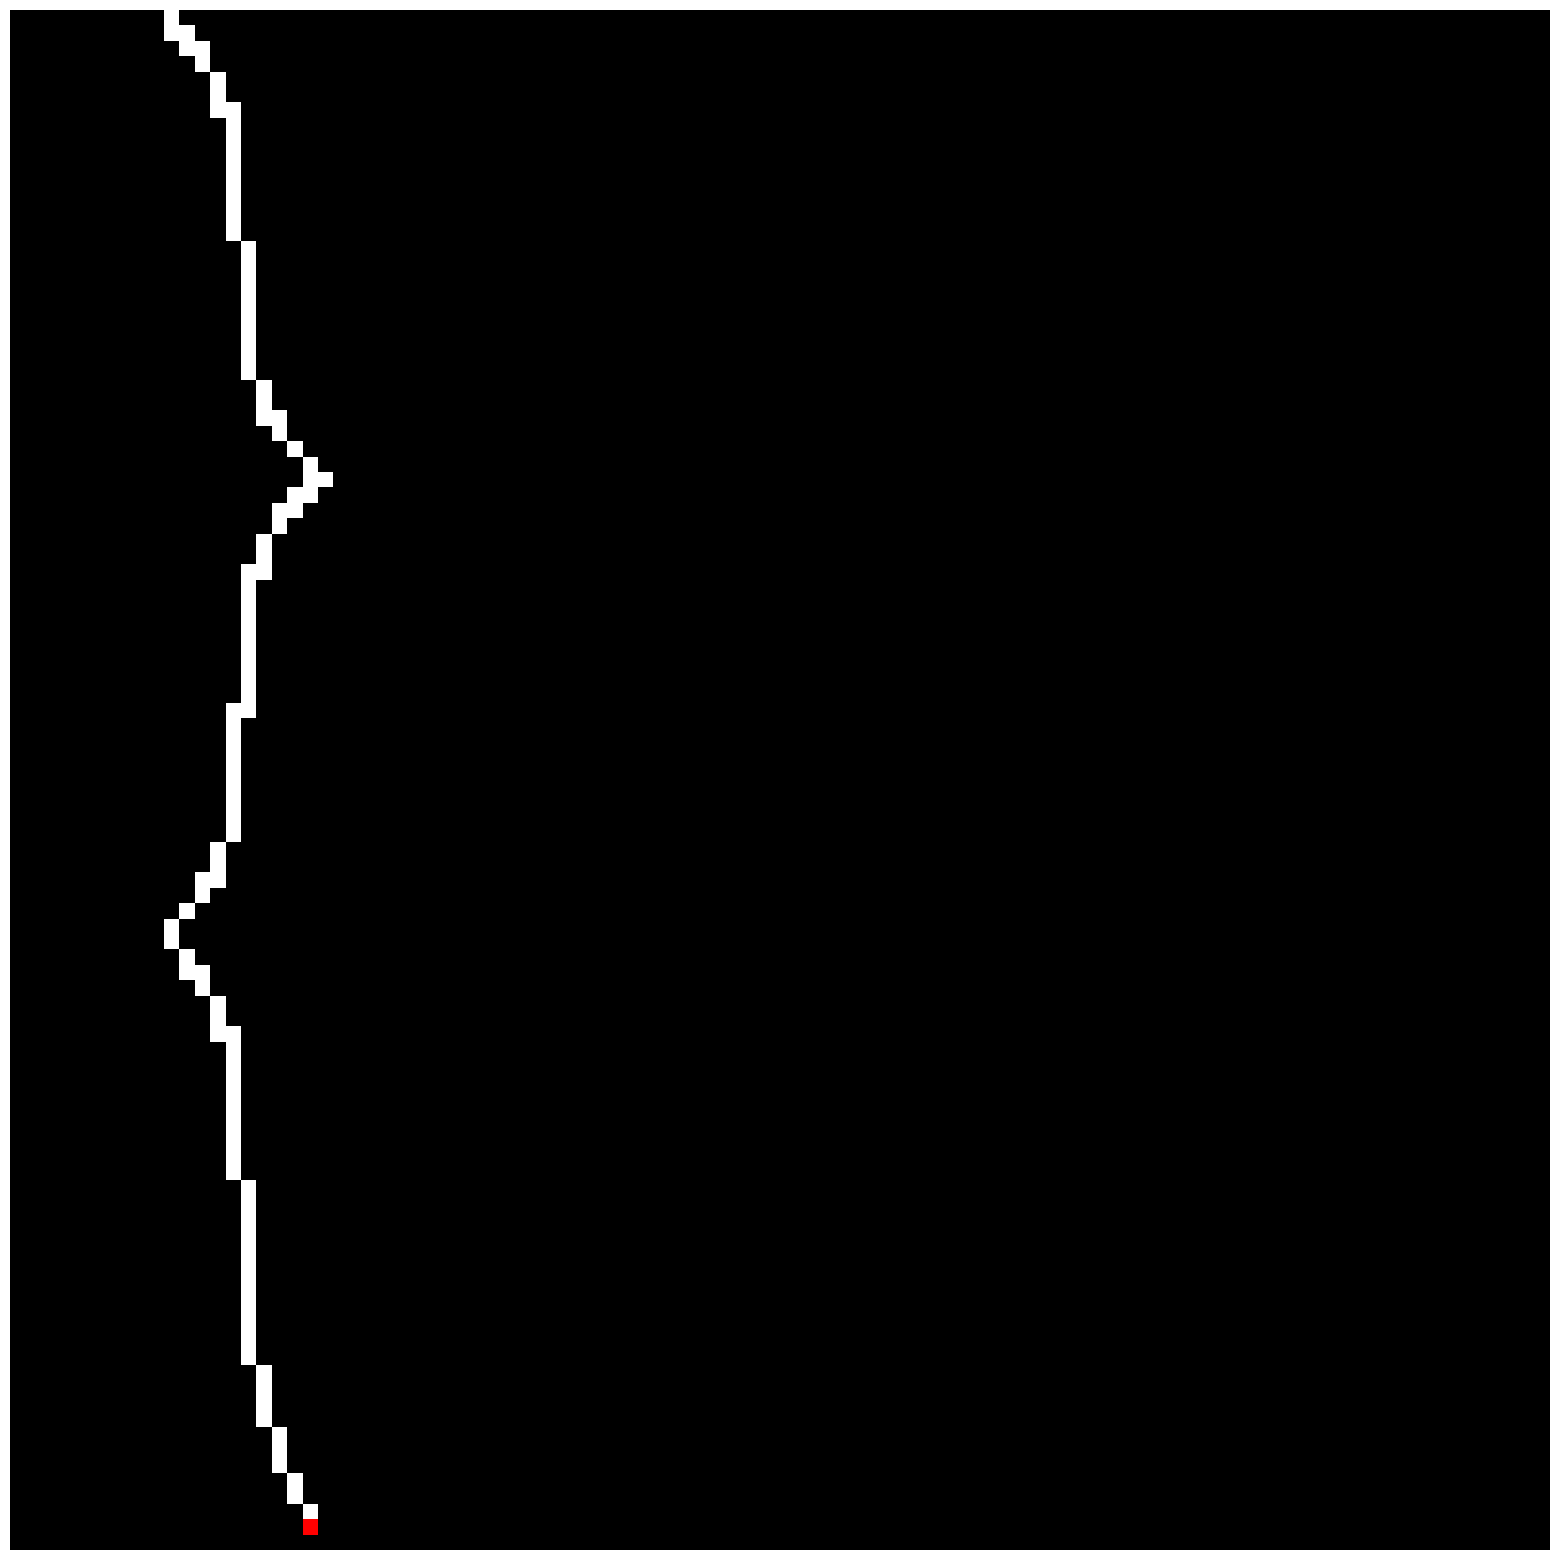

In [38]:
display_image(img)

In [78]:
img = np.zeros((100, 100, 3))

In [79]:
def DerivativeAtPointBezierSpline(P0, P1, P2, P3, t):
    Px =-3*P0[0] + 3*P1[0] + \
        (3*P0[0] - 6*P1[0] + 3*P2[0]) * 2 * t + \
        (-P0[0] + 3*P1[0] - 3*P2[0] + P3[0]) * 3 * t**2
    Py =-3*P0[1] + 3*P1[1] + \
        (3*P0[1] - 6*P1[1] + 3*P2[1]) * 2 * t + \
        (-P0[1] + 3*P1[1] - 3*P2[1] + P3[1]) * 3 * t**2  
    return (Px, Py)

In [80]:
#normal = (-Ty, Tx)
def NormalAtPoint2D(P0, P1, P2, P3, t):
    Px, Py = DerivativeAtPointBezierSpline(P0, P1, P2, P3, t)
    return (int(-Py), int(Px))

In [81]:
spline = ((0,99),(99, 88), (0, 20), (0, 0))

In [104]:
DrawCubicBezierCurveCoefficients(spline[0], spline[1], spline[2], spline[3], img) #draw white curve
point = CubicBezierCurveCoefficients(spline[0], spline[1], spline[2], spline[3], 0.2)
normal = NormalAtPoint2D(spline[0], spline[1], spline[2], spline[3], 0.2)

In [105]:
DrawLine((point[0] - normal[0], point[1] - normal[1]), (point[0] + normal[0], point[1] + normal[1]), img, color=[0, 0.8, 0.2])

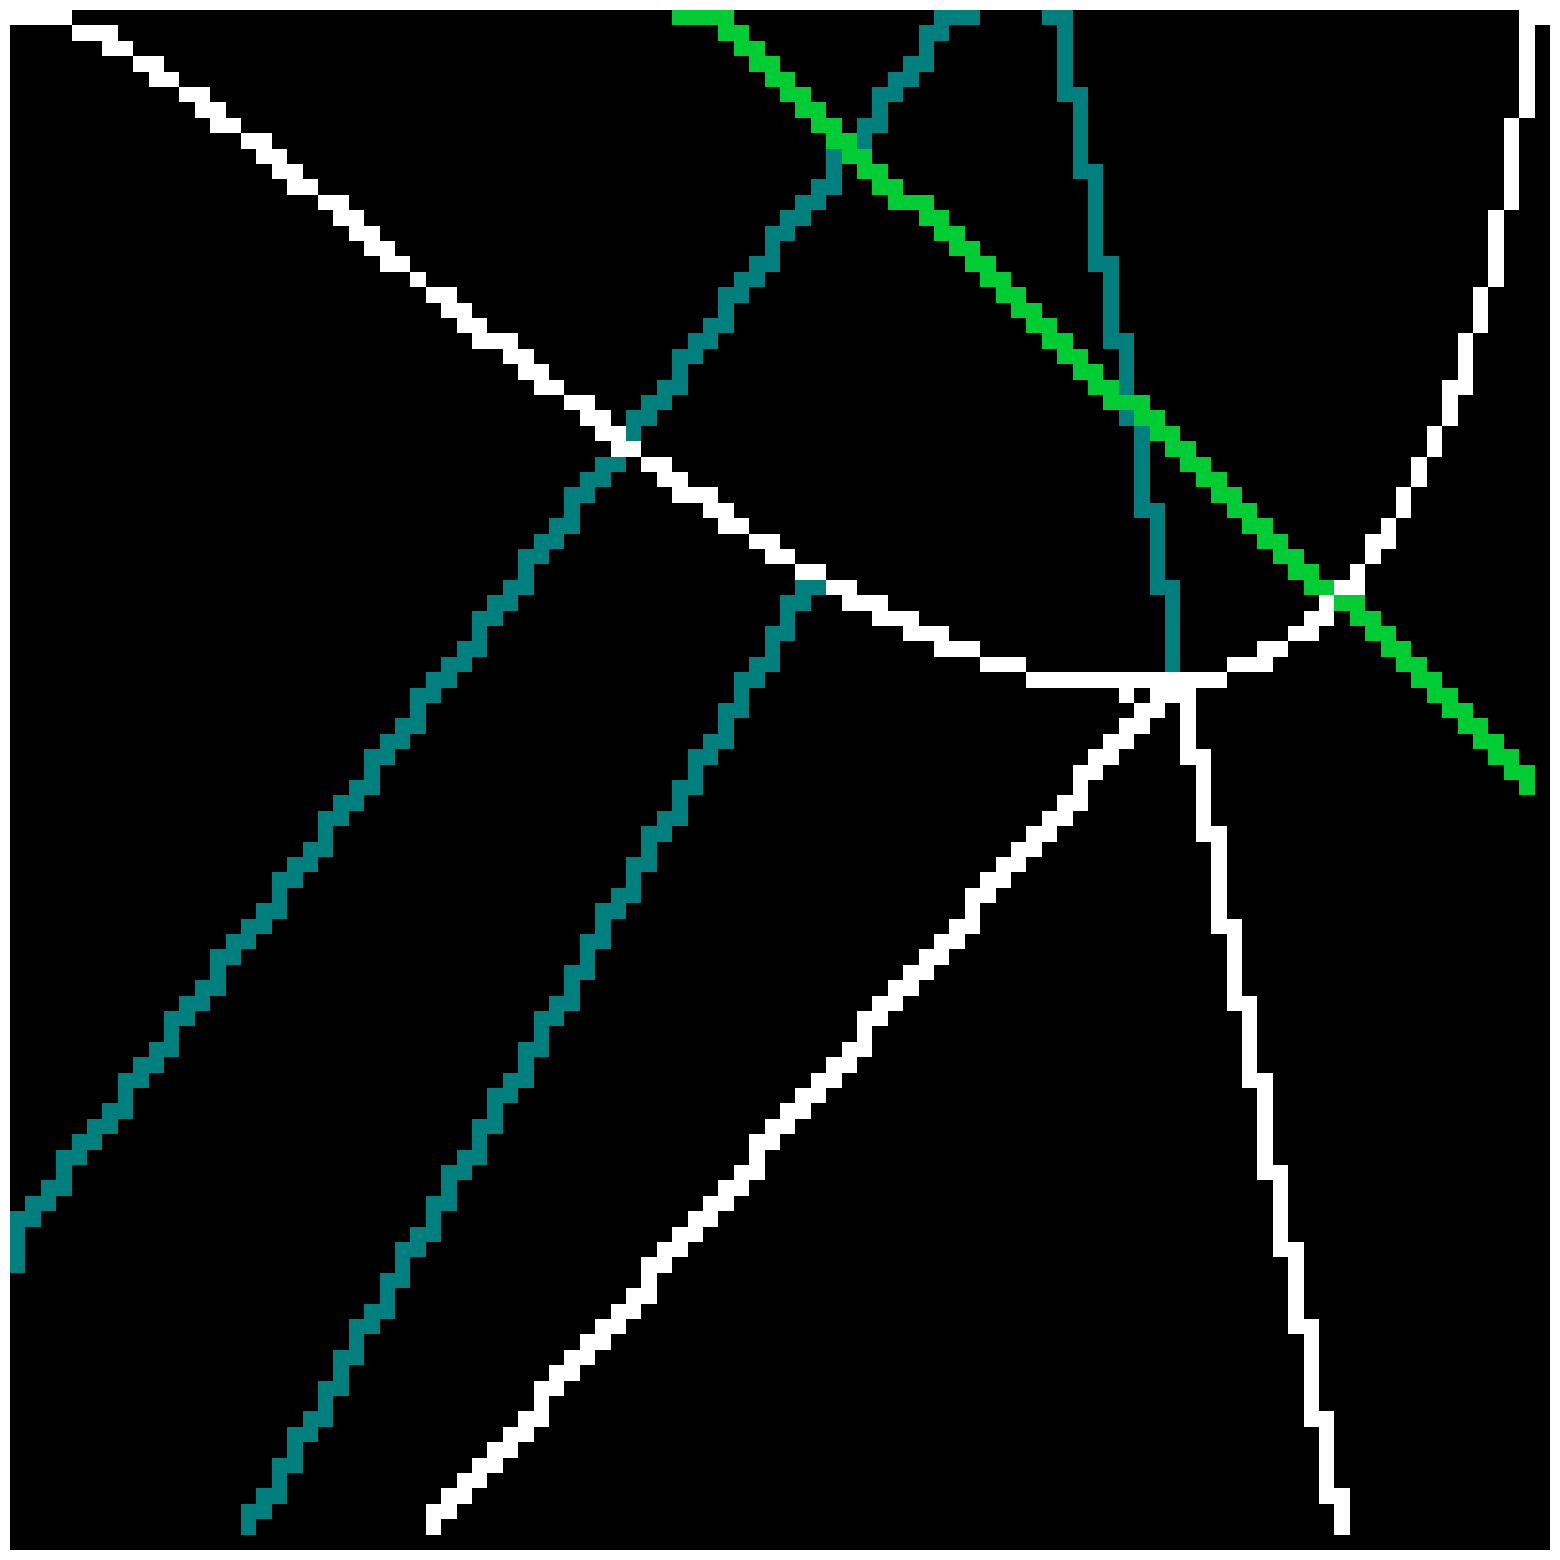

In [106]:
display_image(img)

In [ ]:
display_image(img)

In [ ]:
#tangent = P'(u)||P'(u)|| (velocity normalized)
#normal = (-Ty, Tx)

In [ ]:
derivitave
    Px =-3*P0[0] + 3*P1[0] + \
        (3*P0[0] - 6*P1[0] + 3*P2[0]) * 2 * t + \
        (-P0[0] + 3*P1[0] - 3*P2[0] + P3[0]) * 3 * t**2
    Py =-3*P0[1] + 3*P1[1] + \
        (3*P0[1] - 6*P1[1] + 3*P2[1]) * 2 * t + \
        (-P0[1] + 3*P1[1] - 3*P2[1] + P3[1]) * 3 * t**2  
